<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Evaluating-Classification-Models:-Inbalanced-datasets" data-toc-modified-id="Evaluating-Classification-Models:-Inbalanced-datasets-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Evaluating Classification Models: Inbalanced datasets</a></span><ul class="toc-item"><li><span><a href="#Modify-the-dataset-to-unbalance-it." data-toc-modified-id="Modify-the-dataset-to-unbalance-it.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Modify the dataset to unbalance it.</a></span></li><li><span><a href="#Baseline-the-unbalanced-dataset" data-toc-modified-id="Baseline-the-unbalanced-dataset-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Baseline the unbalanced dataset</a></span></li><li><span><a href="#Evaluation-function" data-toc-modified-id="Evaluation-function-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Evaluation function</a></span></li><li><span><a href="#Oversampling" data-toc-modified-id="Oversampling-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Oversampling</a></span><ul class="toc-item"><li><span><a href="#Random-oversampling" data-toc-modified-id="Random-oversampling-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Random oversampling</a></span></li><li><span><a href="#SMOTE-informed-oversampling" data-toc-modified-id="SMOTE-informed-oversampling-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>SMOTE <em>informed</em> oversampling</a></span></li></ul></li><li><span><a href="#Undersampling" data-toc-modified-id="Undersampling-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Undersampling</a></span><ul class="toc-item"><li><span><a href="#Random-undersampling" data-toc-modified-id="Random-undersampling-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Random undersampling</a></span></li><li><span><a href="#Near-miss-(Tomek-Links)-informed-undersampling" data-toc-modified-id="Near-miss-(Tomek-Links)-informed-undersampling-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Near miss (Tomek Links) <em>informed</em> undersampling</a></span></li></ul></li><li><span><a href="#Summary-of-results" data-toc-modified-id="Summary-of-results-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Summary of results</a></span></li><li><span><a href="#Continue-reading..." data-toc-modified-id="Continue-reading...-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Continue reading...</a></span></li></ul></li><li><span><a href="#Evaluation-of-probability-models-with-log-likelihood" data-toc-modified-id="Evaluation-of-probability-models-with-log-likelihood-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Evaluation of probability models with log likelihood</a></span><ul class="toc-item"><li><span><a href="#The-NULL-Model" data-toc-modified-id="The-NULL-Model-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>The NULL Model</a></span></li><li><span><a href="#The-log-likelihood-of-our-model" data-toc-modified-id="The-log-likelihood-of-our-model-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>The log likelihood of our model</a></span></li></ul></li><li><span><a href="#Cross-Validation" data-toc-modified-id="Cross-Validation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Cross Validation</a></span><ul class="toc-item"><li><span><a href="#CV-with-unbalanced-dataset" data-toc-modified-id="CV-with-unbalanced-dataset-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>CV with unbalanced dataset</a></span><ul class="toc-item"><li><span><a href="#Incorrect-oversampling" data-toc-modified-id="Incorrect-oversampling-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Incorrect oversampling</a></span></li></ul></li></ul></li><li><span><a href="#Bootstrapping" data-toc-modified-id="Bootstrapping-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Bootstrapping</a></span><ul class="toc-item"><li><span><a href="#Bootstrap-the-unbalanced-dataset" data-toc-modified-id="Bootstrap-the-unbalanced-dataset-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Bootstrap the unbalanced dataset</a></span></li><li><span><a href="#Compare-bootstrapping-and-CV" data-toc-modified-id="Compare-bootstrapping-and-CV-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Compare bootstrapping and CV</a></span></li><li><span><a href="#Validate-model-trained-with-oversampling-(SMOTE)" data-toc-modified-id="Validate-model-trained-with-oversampling-(SMOTE)-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Validate model trained with oversampling (SMOTE)</a></span></li></ul></li><li><span><a href="#Significance-Tests" data-toc-modified-id="Significance-Tests-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Significance Tests</a></span><ul class="toc-item"><li><span><a href="#Iterative-validation-process" data-toc-modified-id="Iterative-validation-process-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Iterative validation process</a></span></li><li><span><a href="#Significance-tests" data-toc-modified-id="Significance-tests-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Significance tests</a></span></li></ul></li></ul></div>

In [90]:
# Headers 

import random
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from copy import copy
from collections import Counter
from dataset import Dataset as dataset
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import NearMiss
from scipy.stats import kruskal
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, matthews_corrcoef
from sklearn.pipeline import Pipeline
from sklearn.utils import resample
from tqdm import tqdm_notebook
from typing import List


# This line is important if you want your results to be reproducible
np.random.seed(666)

# Evaluating Classification Models: Inbalanced datasets

You can find many more resources online about the topic, like, for example, [this one](https://towardsdatascience.com/fighting-imbalance-data-set-with-code-examples-f2a3880700a6), or [this other](https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18), which summarize very well the idea behind the technique.

We use the same dataset as in previous lesson, and perform the same set of transformations to build a mixed numerical and categorical set of features.

In [91]:
URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.data'
df = dataset(URL, header=None)
df.to_int()
df.set_target('x9')

df = df.to_categorical(['x1', 'x2', 'x4', 'x5', 'x6', 'x7', 'x8'])
df.discretize('x0', [(15, 20), (20, 25), (25, 30),
                     (30, 35), (35, 40), (40, 50)])
df.discretize('x3', [(0, 2), (2, 4), (4, 6), (6, 8), (8, 10), (10, 20)])
df.onehot_encode(df.names('features'))

## Modify the dataset to unbalance it.

We must inbalance the dataset, and to do so, we will reduce the number of samples of one of the categories (2), and remove the category labeled as "3", so we end up with a binomial classifications problem. Let's show how many values do we have from each one.

In [92]:
df_unbalanced = copy(df)
df_unbalanced.target.value_counts()

1    629
3    511
2    333
Name: x9, dtype: int64

Let's remove those samples for which `target` matches the value `3`, and see what is the new count of values.

In [93]:
df_unbalanced.drop_samples(df_unbalanced.samples_matching(3))
df_unbalanced.target.value_counts()

1    629
2    333
Name: x9, dtype: int64

Now, remove a lot of samples from class `2`, to finally have an unbalanced dataset. We will randomly remove them.

In [94]:
df_unbalanced.drop_samples(random.sample(df_unbalanced.samples_matching(2), k=300))
df_unbalanced.target.value_counts()

1    629
2     33
Name: x9, dtype: int64

I will put all data initialization in a single method `init_dataset()` in case I need to reset data in future steps.

In [95]:
def init_dataset():
    URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.data'
    df = dataset(URL, header=None)
    df.to_int()
    df.set_target('x9')

    # Binomial
    df.drop_samples(df.samples_matching(3))

    df = df.to_categorical(['x1', 'x2', 'x4', 'x5', 'x6', 'x7', 'x8'])
    df.discretize('x0', [(15, 20), (20, 25), (25, 30),
                         (30, 35), (35, 40), (40, 50)])
    df.discretize('x3', [(0, 2), (2, 4), (4, 6), (6, 8), (8, 10), (10, 20)])
    df.onehot_encode(df.names('features'));

    return df

## Baseline the unbalanced dataset

Train and evaluate a basic logistic regression over a split of our **unbalanced** dataset, and check out what is the accuracy score obtained.

In [96]:
X, y = df_unbalanced.split(test_size=0.2)

clf_baseline = LogisticRegression().fit(X.train, y.train)
pred_baseline = clf_baseline.predict(X.test)

print('Accuracy: ', accuracy_score(y.test, pred_baseline).round(3))

Accuracy:  0.94


Seems pretty high, though if we examine the values predicted by our model, we can check that our model always responds with `1`.

In [97]:
print(np.unique(pred_baseline))

[1]


What is the value of the different metrics that we can apply to a classifier? Here we will evaluate F1, Recall and MCC. F1 is already telling us that the classifier is not perfect, though is also throwing a number which is greater than accuracy! Recall says that the model is perfect! And finally, MCC is evaluated as 0, which means that there's something wrong.... and this is the first hint on how unbalanced are our datasets.

In [98]:
print('F1:', f1_score(y.test, pred_baseline))
print('Recall:', recall_score(y.test, pred_baseline))
print('MCC:', matthews_corrcoef(y.test, pred_baseline))

F1: 0.9689922480620156
Recall: 1.0
MCC: 0.0


## Evaluation function

Let me put the evaluating function in a method, for later use it without having to copy and paste the same code again and again.

In [99]:
def evaluate_LogReg(X_train, y_train, X_test, y_test, 
                    return_score='F1',
                    printout=False):
    """
    Fits a logistic regression with the training set, and evaluates it with 
    the test set, using Accuracy, F1, Recall or MCC metrics

    """
    lr = LogisticRegression().fit(X_train, y_train)
    y_hat = lr.predict(X_test)

    accuracy = accuracy_score(y_test, y_hat)
    F1 = f1_score(y_test, y_hat)
    recall = recall_score(y_test, y_hat)
    MCC = matthews_corrcoef(y_test, y_hat)
    
    if printout is True:
        print('Accuracy:', accuracy)
        print('F1:', F1)
        print('Recall:', recall)
        print('MCC:', MCC)
    
    return eval(return_score)

And now, evaluate the balanced dataset to have a baseline.

## Oversampling

### Random oversampling

Let's check what is the result of applying the rather basic oversampling technique to our inbalanced problem. We will test the `scikit` library, and the module `resample`, but also a very specific library to deal with inbalanced datasets called `imblearn`, where we'll try NOT only over/under-sampling, but also some more advanced techniques.

REMEBER: Always _split_ into test and train sets **BEFORE** trying oversampling techniques.

In [100]:
X_test = X.test
y_test = y.test
X = pd.concat([X.train, y.train], axis=1)

class_1 = X[X.x9 == 1]
class_2 = X[X.x9 == 2]

oversampled = resample(class_2, replace=True, n_samples=len(class_1),
                       random_state=666)

oversampled = pd.concat([class_1, oversampled])
oversampled.x9.value_counts()

2    504
1    504
Name: x9, dtype: int64

Now, fit the logistic regression and check what is the result.

In [101]:
y_train = oversampled.x9
X_train = oversampled.drop('x9', axis=1)

random_oversample = evaluate_LogReg(X_train, y_train, X_test, y_test, printout=True)

Accuracy: 0.7293233082706767
F1: 0.8407079646017699
Recall: 0.76
MCC: 0.00556242699362481


We can see that:

- Accuracy is lower now, and I would say that now that dataset is balanced, this is the closest value to reality in our problem.
- F1 and reacall are close to accuracy.
- MCC is revealing a slight trend towards the correct classification, and unveils some problems with our classifier. This is the reason why MCC is always a good choice.

### SMOTE _informed_ oversampling

Let's try now some informed strategy to perform the oversampling. Instead of simply randomly select samples from the minority class and duplicate them, we will build new synthetic samples, based on the information contained in their neares neighbours. This strategy is called SMOTE, which stands for Synthetic Minority Oversampling Technique.

In [102]:
X, y = df_unbalanced.split(test_size=0.2)
X_train, y_train = SMOTE().fit_resample(X.train.values, y.train.values)

unique, counts = np.unique(y_train, return_counts=True)
print('Oversample count\n', np.asarray((unique, counts)).T, '\n')

smote_oversample = evaluate_LogReg(X_train, y_train, X_test, y_test, printout=True)

Oversample count
 [[  1 504]
 [  2 504]] 

Accuracy: 0.7443609022556391
F1: 0.8508771929824562
Recall: 0.776
MCC: 0.01479088322370293


## Undersampling

### Random undersampling

As we did with out previous technique, we will first check how our model performs when using a random undersampling technique from `scikit-learn`.

In [103]:
X, y = df_unbalanced.split(test_size=0.2)
X_test = X.test
y_test = y.test

X = pd.concat([X.train, y.train], axis=1)

class_1 = X[X.x9 == 1]
class_2 = X[X.x9 == 2]

undersampled = resample(class_1, replace=True,
                        n_samples=len(class_2), random_state=666)

undersampled = pd.concat([undersampled, class_2])
undersampled.x9.value_counts()

2    25
1    25
Name: x9, dtype: int64

Now, fit the logistic regression and check what is the result.

In [104]:
y_train = undersampled.x9
X_train = undersampled.drop('x9', axis=1)

random_undersample = evaluate_LogReg(X_train, y_train, X_test, y_test, printout=True)

Accuracy: 0.6240601503759399
F1: 0.7572815533980581
Recall: 0.624
MCC: 0.12132635933747239


What would be the result with the library `imblearn`? We will see that the procedure is a bit simpler since the library gueses what is the final number of samples we must use, by making the number of samples equal to the minimum from each value.

In [105]:
X, y = df_unbalanced.split(test_size=0.2)

undersampled = RandomUnderSampler(random_state=666)
X_train, y_train = undersampled.fit_resample(X.train.values, y.train.values)

unique, counts = np.unique(y_train, return_counts=True)
print('Undersample count\n', np.asarray((unique, counts)).T, '\n')

random_undersample = evaluate_LogReg(X_train, y_train, X_test, y_test, printout=True)

Undersample count
 [[ 1 25]
 [ 2 25]] 

Accuracy: 0.5639097744360902
F1: 0.7070707070707072
Recall: 0.56
MCC: 0.08839641927498686


The results are quite similar the ones obtained with the `sklearn` method because we're only randomly sampling from one of the classes, to make it greater (oversampling) or smaller (undersampling).

### Near miss (Tomek Links) _informed_ undersampling

Why don't remove samples, but, following an informed strategy? Obvious one, is to remove only those samples from the majority class that are _closer_ to minority class. This way, we're loosing information only on the boundary between the two classes, improving the final result of our classifier. This strategy is normally called __Near Miss__, and we'll use the `imblearn` library to run this example.

In [106]:
X, y = df_unbalanced.split(test_size=0.2)
X_train, y_train = NearMiss().fit_resample(X.train.values, y.train.values)

unique, counts = np.unique(y_train, return_counts=True)
print('Undersample count\n', np.asarray((unique, counts)).T, '\n')

tomek_undersample = evaluate_LogReg(X_train, y_train, X_test, y_test, printout=True);

Undersample count
 [[ 1 25]
 [ 2 25]] 

Accuracy: 0.3609022556390977
F1: 0.4970414201183432
Recall: 0.336
MCC: 0.04345873790042522


Metrics have worsen very much, which means that this reduced dataset obtained by undersampling is not good enough to generalize over the test set.

## Summary of results

We're getting better results with oversampling techniques, though we can't conclude anything for sure, as we've only tested the different approachs once, with a single split. It could be interesting to see how Near Miss (Tomek Links) performs with multiple evaluations.

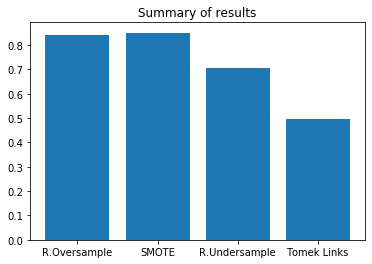

In [107]:
plt.title('Summary of results')
plt.bar(range(4), [random_oversample, smote_oversample, random_undersample, tomek_undersample])
plt.xticks(range(4), ('R.Oversample','SMOTE','R.Undersample','Tomek Links'))
plt.show()

## Continue reading...

These are the basic strategies to deal with inbalanced datasets. The `imblearn` library contains quite a few of additional methods to apply, which means that you can still try several other strategies. Just to name the most relevant ones:

- ADASYN: similar to SMOTE but generating synthetic samples in those regions where it is more difficult to learn the difference between the two classes. The criteria is to count the number of neighbours.
- Oversample + Undersample: To prevent the biass generated by the oversample technique, we introduce a new stage of informed undersampling similar to the near miss strategy, to smooth and simplify the decision bounday between the two classes.

# Evaluation of probability models with log likelihood

Let's try to obtain the metric from our prediction, and later interpret it.

To start, we prepare our dataset the same way we've doing so far, and split it.

In [108]:
df = init_dataset()
X, y = df.split()

Now we must train a logistic regression and obtain the predictions for the test set. The criteria that we will use is that the class `1` will be the possitive class, the class `2` will be the negative. It will be more correct to change the values within the DataFrame to `1` and `0`, respectively, but that will also add unnecessary coding.

In [109]:
lr = LogisticRegression().fit(X.train, y.train)
y_hat = lr.predict(X.test)
y_probs = lr.predict_proba(X.test)

counts = y.test.x9.value_counts()
print('{} samples in test set, {} from class_1, and {} from class_2'.format(
    y.test.shape[0], counts.iloc[0], counts.iloc[1]))

193 samples in test set, 126 from class_1, and 67 from class_2


What do we need to use here? Namely, the probabilities thrown by our model. Let's take a look at the variable `y_probs`:

In [110]:
y_probs[:5]

array([[0.6514892 , 0.3485108 ],
       [0.24697011, 0.75302989],
       [0.95196017, 0.04803983],
       [0.76286084, 0.23713916],
       [0.78157748, 0.21842252]])

First column is the probability that each sample belong to the Class #1. That is the only probability we need to use.

## The NULL Model

What is our NULL Model? The model that returns a random value, according to the probability distribution of the classes (1/2) in our classification problem. Given that we have 193 samples, 126 belonging to class #1, and 67 belonging to class #2, our probabilities are:

$$ log P(C_1) = log \left( \frac{126}{193} \right) = -0.6152 $$

$$ log P(C_2) = log \left( 1 - P(C_1) \right) = log \left( 1 - \frac{126}{193} \right) = -1.5264 $$

The _log likelihood_ of the NULL model is:

$$ \sum_{i}^{m} log P(C_i) $$

where $m$ is the number of samples (193) and the expression within the sum applies to each individual sample, being $P(C_i)$ the probability of the class the sample belongs to.

To compute the sum of all those values, we use the following expresion:

In [111]:
test_set = pd.concat([X.test, y.test], axis=1)
null_model = test_set.apply(
    lambda row: -0.6152 if row['x9'] == 1 else -1.5264, axis=1).sum()

print('Log likelihood of the null model:', null_model.round(2))

Log likelihood of the null model: -179.78


## The log likelihood of our model

To compute the _log likelihood_ of our model we must apply the same formula than above, but for each sample, the probability $P(C_i)$ is the one that our model is assigning to each sample. Remember it is in the first column of the array `y_probs` returned by calling the method `predict_proba()`.

We are building a data frame consisting of the actual class each sample in the dataset belongs to, followed by the probability that the logistic regression assigned to each sample in the dataset –which is stored in the first column of `yprobs` (i.e.: `y_probs[:, 0]`). We must use `y.test.values.ravel()` because out labels are in an N-Dimensional array, and must be flattened.  

In [112]:
mr = pd.DataFrame({'x9': y.test.values.ravel(), 'prob': y_probs[:, 0]})
mr.head()

,x9,prob
0,2,0.651489
1,2,0.246970
2,1,0.951960
3,1,0.762861
4,1,0.781577


And now we can apply the same expression used to compute the Log Likelihood of the null model, with a slight adaptation to take the actual probabilities returned by the model.

In [113]:
lr_model = mr.apply(
    lambda row: np.log(row['prob']) if row['x9'] == 1 else 1.0 - np.log(row['prob']), axis=1).sum()

print('Log likelihood of our model:', lr_model.round(2))

Log likelihood of our model: 67.17


To assess how good or bad is our log likelihood, we compare that value with the obtained for the NULL model to check that the model log likelihood is much greater than the one from the NULL one:

$$ 67.17 >> -179.78 $$

The log likelihood describes how likely it is to observe the ground truth labels `y.test` with the given data `X` and the learned coefficients in our logistic regression: 

$$ arg\ max_{\beta}\ \ log( P(y | X, \beta) )$$

So, our conclusion is that the logistic regression applied to our dataset is able to predict better than a simple random classifier. This is a good step forward that validates our approach to use Logistic Regression as estimator.

# Cross Validation

Cross validation implies that instead of evaluating the model with a single split of train/test, we will use a k-fold technique, and that will produce different results each time is evaluated. 

The name of the technique referes to the number of folds or subsets are generated. If we say 10-fold, the original dataset is divided into 10 non-overlapping subsets. For each of those subsets, the technique trains the algorithm with the remaining 9, and evaluates the result with the leaved-out one. This process generates 10 different scores, that will be averaged to have a hint on what will be the behavior of our model _in production_.

The outcome of the CV process is an assessment on whether our model parameters tend to overfit (our CV score is much better than the validation score), or produce similar results on average.

In [114]:
df = init_dataset()

To correctly perform CV, we normally leave a validation set (also called test set), out of the process. This is our original split between training and set. We don't have to change anything there

In [115]:
X, y = df.split()

Now let's build the CV in Python with the help of the `sklearn` library. 

We need:
  - a _learner_ or _estimator_ name, 
  - the dataset used for training ($X$), 
  - the labels with the correct response ($y$), 
  - the evaluation metric that we want to use, and 
  - the number of splits/folds that we want.

In [116]:
my_model = LogisticRegression()
cv_scores = cross_val_score(my_model, X.train, y.train, scoring='f1', cv=20)

print("F1: %0.4f (+/- %0.2f)" % (np.median(cv_scores), np.std(cv_scores)))

F1: 0.8235 (+/- 0.05)


We can see that the 10 different scores ranges between .77 and .85, which means that the performance of the model heavily depends on the split used for training. But, what can we infer from this?

In [117]:
def plot_scores(scores, labels):
    """
    Receives scores (one or several arrays) and plots a scatter to the left with
    the values of the first one, and a boxplot with all of them to the right.
    
    Arguments
        scores: single list of scores, or list of lists of scores.
        labels: single label or list of labels identifying the scores passed
    """
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.title('Scores from {}.'.format(labels[0]))
    plt.scatter(range(len(scores[0])), scores[0])
    
    plt.subplot(1, 2, 2)
    plt.title('{} scores stdev={:.4f}'.format(labels[0], np.std(scores[0])))
    for i in range(len(scores)):
        plt.axhline(np.median(scores[i]), color='orange', 
                    linestyle='--', linewidth=0.5)
    plt.boxplot(scores, labels=labels)
    plt.ylim(bottom=0.6, top=1.0)
    
    plt.show()

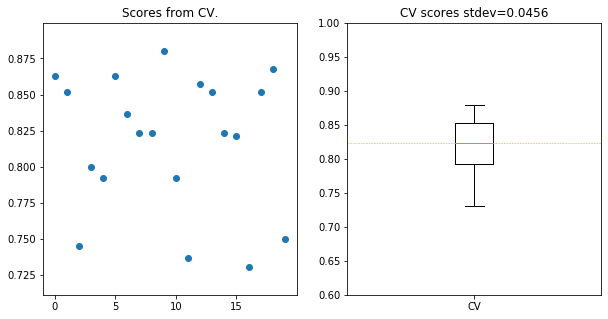

In [118]:
plot_scores([cv_scores], ['CV'])

First and most important thing is that we can state (with a reasonable degree of certainty) that our model is expected to have a 0.82 F1 Score when classifying new unseen data. Let's confirm that: 

In [119]:
lr = my_model.fit(X.train, y.train)
y_hat = my_model.predict(X.test)

print('F1 in production: {:.4f}'.format(f1_score(y.test, y_hat)))

F1 in production: 0.7778


$$ 0.7778 + 0.05 = 0.8278 \subset 0.8235 \pm 0.05 = (0.7735, 0.8735) $$

Which means that our assumption was right! We can see that our estimation from CV was higher than the final result, which means that our model is not overfitting and generalizing reasonably well with unseen data.

We always set the baseline using a CV procedure like the one above. And from that base metric, we assess if our feature engineering or parameters search is producing better results, BUT always using CV evaluation.

## CV with unbalanced dataset

Let's repeat the oversampling SMOTE technique, but with CV. We must be careful, as to apply CV right, we must perform the oversampling within each fold/split produced by the CV method. It is incorrect to oversample, and then apply CV.

In [120]:
# Measure the CV score over the unbalanced dataset.
X, y = df_unbalanced.split()
cv_unbalanced_scores = cross_val_score(LogisticRegression(), X.train, y.train, 
                                       scoring='f1', cv=20)

In [121]:
# Now, do the same, but applying SMOTE oversampling to each fold.
cv = StratifiedShuffleSplit(n_splits=20)
cv_smote_scores = []
for train_idx, test_idx, in cv.split(X.train.values, y.train.values):
    # Take the samples from the fold made by the CV method
    X_train, y_train = X.train.values[train_idx], y.train.values[train_idx]
    X_test, y_test = X.train.values[test_idx], y.train.values[test_idx]
    
    # Apply SMOTE to the training subset
    X_train, y_train = SMOTE().fit_resample(X_train, y_train)
    
    # Evaluate the model and store it in the array.
    f1 = evaluate_LogReg(X_train, y_train, X_test, y_test)    
    cv_smote_scores.append(f1)

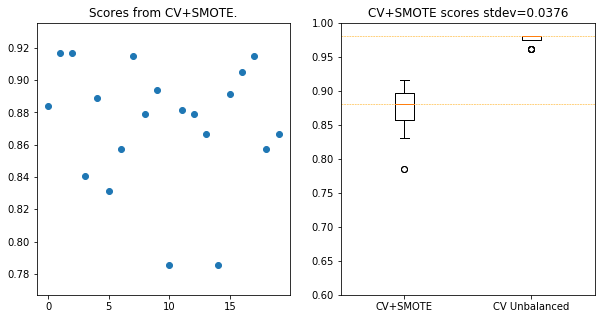

In [122]:
plot_scores([cv_smote_scores, cv_unbalanced_scores], 
            ['CV+SMOTE', 'CV Unbalanced'])

As we can see in the figure above, the median F1 score for the oversampled datasets is worse than with the baseline for the imbalanced. This is because the model trained with the unbalanced dataset is not learning well to predict the minority class, and is highly biassed towards the majority class.

The new dataset, coming out from oversampling stage is much more balanced and reflects more accurately our expectancies on model's behavior in production.

### Incorrect oversampling

What would be the effect of incorrectly applying oversampling outside the CV loop?

In [123]:
# Measure the CV score over the unbalanced dataset.
X, y = df_unbalanced.split()
X_train, y_train = SMOTE().fit_resample(X.train.values, y.train.values)

wrong_scores = cross_val_score(LogisticRegression(), 
                               X_train, y_train, scoring='f1', cv=20)

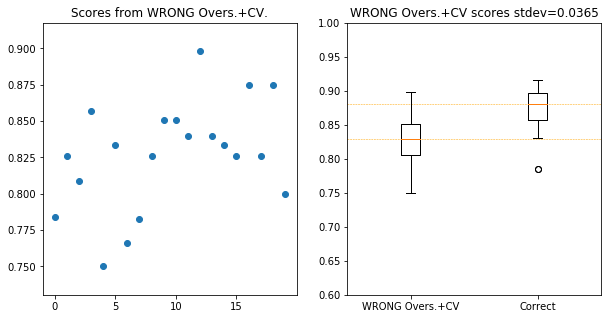

In [124]:
plot_scores([wrong_scores, cv_smote_scores], ['WRONG Overs.+CV', 'Correct'])

The incorrect oversampling is producing a much higher variance of results and wider IQR. Some of the results are actually performing perfectly (F1 = 1.0). This may lead to incorrect assumptions over the model.

# Bootstrapping

As we saw in class, bootstrapping is a technique that can be used to estimate population statistics by repeatedly sampling with replacement and measuring. But this technique can also be used to perform model validation in a very similar way to cross-validation: we will evaluate our model with bootstrapped samples of our population.

The number of possible combinations of train/test pairs is much larger in bootstrapping, but surprisingly, it does not take longer to stabilize results. It will be enough to run bootstrapped evaluations ~300 times, to obtain a valid result. Let's try!

The `resample()` [scikit-learn function](http://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html) can be used. It takes as arguments the data array, whether or not to sample with replacement, the size of the sample, and the seed for the pseudorandom number generator used prior to the sampling. For example, we can create a bootstrap that creates a sample with replacement with 4 observations and uses a value of 1 for the pseudorandom number generator.

    boot = resample(data, replace=True, n_samples=4, random_state=123)
   
We need a routine to simply bootstrap samples out of the initial `.train` split, letting those not in there, as part of the test set.

We must split the original dataset and leave a 20% validation dataset for later validating results. The bootstrap will be done over the 80% dataset resulting from the random split

In [125]:
df = init_dataset()
X, y = df.split()

This is the routine that will split $X$ and $y$ in training and test, using _bootstrapping_.

In [126]:
def bootstrap_split(X, y, seed, training_size=0.8):
    train_num_samples = X.shape[0]
    X_train, y_train = resample(X, y, replace=True, 
                                n_samples=int(train_num_samples * 0.8),
                                random_state=seed)

    # Take the indices present in the training samples
    indices_in_training = X_train.index.to_list()

    # Those, NOT in training are, go to the test set.
    X_test = X[~X.index.isin(indices_in_training)]
    y_test = y[~y.index.isin(indices_in_training)]

    return X_train, y_train, X_test, y_test

And now, simply call the bootstrapping routing with our training portion of the original split. We should repeat this call as many times as we want to evaluate our method.

In [127]:
bs_scores = []
for i in range(20):
    X_train, y_train, X_test, y_test = bootstrap_split(X.train, y.train, 
                                                       seed=i*23)
    bs_scores.append(evaluate_LogReg(X_train, y_train, X_test, y_test))

print("F1 (bootstrapping): %0.4f (+/- %0.2f)" % (np.median(bs_scores), np.std(bs_scores)))

F1 (bootstrapping): 0.8103 (+/- 0.02)


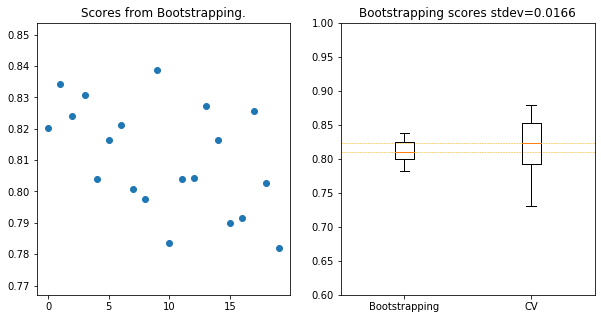

In [128]:
plot_scores([bs_scores, cv_scores], ['Bootstrapping', 'CV'])

The results differ with those obtained with CV. Lower variance (stdev), though similar median values. Can we state that both methods are providing similar results?

## Bootstrap the unbalanced dataset

Apply Bootstrapping to our undersampling with SMOTE loop, used in the previous section, but replacing CV by this new sampling method.

In [129]:
X, y = df_unbalanced.split()

# Now, do the same, but applying SMOTE oversampling to each fold.
bs_smote_scores = []
for i in range(20):
    # Take the samples from the fold made by the Bootstrapping method
    X_train, y_train, X_test, y_test = bootstrap_split(X.train,  y.train, 
                                                       seed=i*23)
    # Apply SMOTE to the training subset
    X_train, y_train = SMOTE().fit_resample(X_train.values, y_train.values)
    f1 = evaluate_LogReg(X_train, y_train, X_test, y_test)
    bs_smote_scores.append(f1)

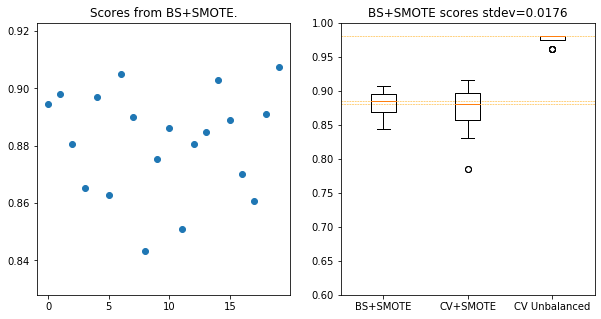

In [130]:
plot_scores([bs_smote_scores, cv_smote_scores, cv_unbalanced_scores], 
            ['BS+SMOTE', 'CV+SMOTE', 'CV Unbalanced'])

We see that slight difference between bootstrapping and cross-validation. A little higher value for the median of the scores: bootstrapping is more optimistic. We see that CV present two outliers and a smaller IQR which is a symptom of a narrower search space, probably due to the large overlap between samples in different splits.

## Compare bootstrapping and CV

We now want to compare how both techniques differ after a relatively large number of iterations. Say, 100. We do expect bootstrapping to perform a wider search over different combinations of values, and CV to explore a narrower amount of variance due to its methodical exploration mechanism.

We're building two methods that simply copy the lines in the previous section (CV and Bootstrap) and they repeat the process 100 times. After each iteration, the median of the values obtained through the bootstrappint or CV is stored and returned at the end.

In [131]:
def bs_med_score():
    bootstrap_scores = []
    for i in range(10):
        X_train, y_train, X_test, y_test = bootstrap_split(X.train,  y.train,
                                                           seed=i*23)
        # Apply SMOTE to the training subset
        X_train, y_train = SMOTE().fit_resample(X_train.values, y_train.values)
        bootstrap_scores.append(evaluate_LogReg(
            X_train, y_train, X_test, y_test))

    return np.median(bootstrap_scores)


def cv_med_score():
    cv = StratifiedShuffleSplit(
        n_splits=10, random_state=random.randint(1, 100))
    cv_scores = []
    for train_idx, test_idx, in cv.split(X.train.values, y.train.values):
        # Take the samples from the fold made by the CV method
        X_train, y_train = X.train.values[train_idx], y.train.values[train_idx]
        X_test, y_test = X.train.values[test_idx], y.train.values[test_idx]

        # Apply SMOTE to the training subset, train the LR and obtain F1
        X_train, y_train = SMOTE().fit_resample(X_train, y_train)
        cv_scores.append(evaluate_LogReg(X_train, y_train, X_test, y_test))

    return np.median(cv_scores)

We run bootstrapping 100 times, collecting the median of the F1 score obtained each time.

In [132]:
bs_smote_med_scores = [bs_med_score() for _ in tqdm_notebook(range(100))]

We run CV 100 times, collecting the median of the F1 score obtained each time.

In [133]:
cv_smote_med_scores = [cv_med_score() for _ in tqdm_notebook(range(100))]

We plot the resulting experiment for CV (left) and Bootstrapping (right)

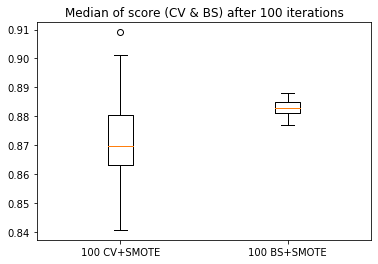

In [134]:
# Boxplot 
plt.title('Median of score (CV & BS) after 100 iterations')
plt.boxplot([cv_smote_med_scores, bs_smote_med_scores], 
            labels=['100 CV+SMOTE', '100 BS+SMOTE'])
plt.show()

We can observe/confirm:

- Bootstrap remains optimistic (higher median of F1 score), 
- CV produces a wider range of possible values (higher uncertainty about the model performance with unseen data), or higer variance in results.
- Bootstrap converges systematically to a well defined range of values, without extreme events.

We now have to perform the final assessment, which consist in evaluating the model with the held-out dataset resulting from our call to `split()` at the beginning of the process. This portion will validate our results as follows:

- We expect our model to behave slightly worse with unseen data.
- If our model performs significantly **better** with unseen data, that could mean that our splitting function might be wrong (training set is not representative) or that we're making our training conditions (regularization) harder than needed.
- If our model performs significantly **worse** in test, that clearly means that we are overfitting during training: due to large/incorrect number of predictors or incorrect parameters in our learner.

## Validate model trained with oversampling (SMOTE)

Final step is to evaluate our model. We will use the `.test` property of `X` and `y` variables obtained after the call to `split()`. Those contain 20% of the samples.

In [135]:
X, y = df_unbalanced.split()

# Train a LR with the oversampled portion of the split
X_train, y_train = SMOTE().fit_resample(X.train.values, y.train.values)
lr = my_model.fit(X_train, y_train)
y_hat = my_model.predict(X.test)

# Compute the metrics
f1 = f1_score(y.test, y_hat)
f1_cv = np.median(cv_smote_med_scores)
f1_bs = np.median(bs_smote_med_scores)

print('F1 with unseen data: {:.4f}'.format(f1))
print('F1 estimated by CV: {:.4f} ({:.2f}%)'.format(
    f1_cv, ((f1_cv-f1)/f1)*100.))
print('F1 estimated by Bootstrapping: {:.4f} ({:.2f}%)'.format(
    f1_bs, ((f1_bs-f1)/f1)*100.))

F1 with unseen data: 0.8304
F1 estimated by CV: 0.8697 (4.73%)
F1 estimated by Bootstrapping: 0.8828 (6.31%)


The closest result is coming from CV. Bootstrapping has been a bit more optimistic.

# Significance Tests

How sure we're about our results? Have we obtained them by chance? Did uur random generator gave us the most representative split? Let's see how to be a bit more sure about the results by

1. Repeating the final validation a number of times, with different splits,
2. Computing a singificance test over the CV results.

## Iterative validation process

We should never rely on a single random decision, like the one taken when splitting the dataset at the beginning of the oversampling, to eventually assess the production performance on the initial leave-out fold. We should repeat that split a number of times, to be sure that our estimates are ok.

Let's repeat the split, training and validation 100 times, to take 100 different measurements of what is the expected performance of a model trained with an oversampled split.

In [136]:
def repeat_validation(n_times=100):
    f1s = []
    for _ in tqdm_notebook(range(n_times)):
        X, y = df_unbalanced.split(seed=random.randint(1, 100))
        X_train, y_train = SMOTE().fit_resample(X.train.values, y.train.values)
        lr = my_model.fit(X_train, y_train)
        y_hat = my_model.predict(X.test)
        f1s.append(f1_score(y.test, y_hat))

    return f1s

In [142]:
f1s = repeat_validation(100)
m_f1 = np.median(f1s)
print('Median of F1 with unseen data, after 100 iterations: {:.4f}'.format(
    np.median(m_f1)))
print('F1 estimated by CV: {:.4f} ({:.2f}%)'.format(
    f1_cv, ((f1_cv-m_f1)/m_f1)*100.))
print('F1 estimated by Bootstrapping: {:.4f} ({:.2f}%)'.format(
    f1_bs, ((f1_bs-m_f1)/m_f1)*100.))


Median of F1 with unseen data, after 100 iterations: 0.8444
F1 estimated by CV: 0.8697 (2.99%)
F1 estimated by Bootstrapping: 0.8828 (4.54%)


Even repeating the process 100 times, I find discrepancies, and some times bootstrap and CV produce nearly same results, and some others BS doubles the distance to the actual median of F1. All in all, BS tipically is producing optimistic results, compared to CV.

## Significance tests

We will use an statistical signficance test to compare if results from two models come from the same distribution. Our two result sets come from the evaluation made over the test set, as in `repeat_validation()` method (`f1s`), and from the CV+SMOTE F1 scores obtained by repeating the process of CV (`cv_smote_med_scores`).

We're interested in a significance test that will assess the medians, and for that purpose, Kruskal-Wallis test could do the job. It is a non-parametric test, which means that it does not take any assumption on the distribution of the data, which is specially convenient.

As it is very well explained [here](https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/): _The default assumption or the null hypothesis is that all data samples were drawn from the same distribution. Specifically, that the population medians of all groups are equal. A rejection of the null hypothesis indicates that there is enough evidence to suggest that one or more samples dominate another sample, but the test does not indicate which samples or by how much_.

So, go for it.

In [138]:
def kw_test(data1, data2):
    stat, p = kruskal(data1, data2)
    print('Statistics={:.2f}, p={:.4f}'.format(stat, p))
    alpha = 0.05
    if p > alpha:
        print('Same distributions (fail to reject H0)')
        return True
    else:
        print('Different distributions (reject H0)')
        return False

In [139]:
kw_test(f1s, cv_smote_med_scores)

Statistics=60.88, p=0.0000
Different distributions (reject H0)


False

In [140]:
kw_test(f1s, bs_smote_med_scores)

Statistics=116.91, p=0.0000
Different distributions (reject H0)


False

In [141]:
kw_test(cv_smote_med_scores, bs_smote_med_scores)

Statistics=57.49, p=0.0000
Different distributions (reject H0)


False

Although this significance test has been proposed simply to illustrate how to apply them, ideally the way of applying it is to use it over two different models, over the same split/fold, to finally decide whether their results are equivalent.